In [80]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\Shalya\\Downloads\\insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

In [11]:
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

In [12]:
data.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [13]:
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [14]:
data.region.value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [16]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [18]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

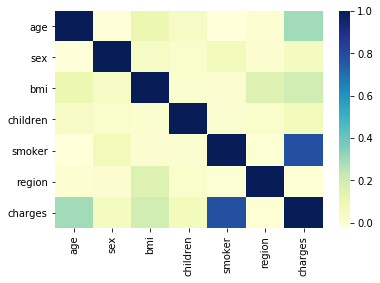

In [25]:
%matplotlib inline
corr = data.corr()
sns.heatmap(corr, cmap="YlGnBu")

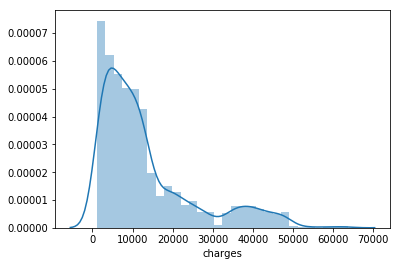

In [27]:
##Distribution of charges
sns.distplot(data.charges)

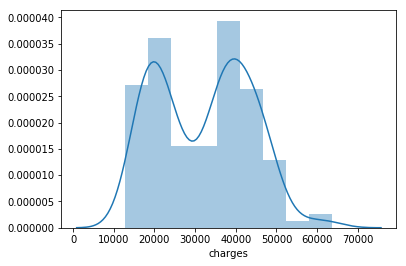

In [28]:
sns.distplot(data.charges[data.smoker==1])

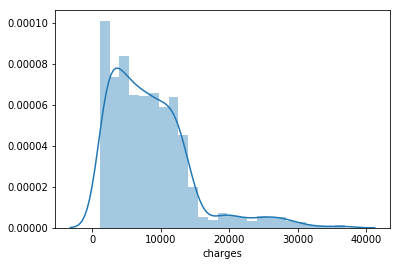

In [29]:
sns.distplot(data.charges[data.smoker==0])

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
X = data.drop(['charges'], axis = 1)
Y= data['charges']
seed = 7
kfold = KFold(n_splits=5,random_state = seed)
scoring = "r2"

In [52]:
model_lm = LinearRegression()
results_lm_score = cross_val_score(model_lm, X, Y, cv = kfold, scoring=scoring)

In [54]:
results_lm_score

array([0.76123983, 0.70838663, 0.77786772, 0.73365206, 0.7551335 ])

In [61]:
results_lm_pred = cross_val_predict(model_lm, X,Y, cv = kfold)

In [62]:
len(results_lm_pred)

1338

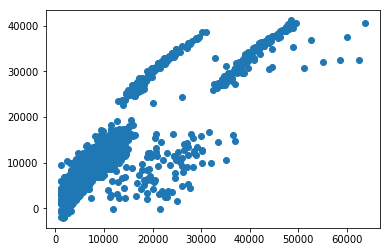

In [63]:
plt.scatter(Y, results_lm_pred)

In [65]:
print("Accuracy r2 : %.2f" % (r2_score(Y,results_lm_pred)))

Accuracy r2 : 0.75


In [66]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor

In [67]:
model_dt = DecisionTreeRegressor()
results_dt_score = cross_val_score(model_dt, X, Y, cv = kfold, scoring = scoring)


In [68]:
results_dt_score

array([0.75578017, 0.69486945, 0.74032363, 0.72546245, 0.68172358])

In [74]:
results_df_pred = cross_val_predict(model_dt, X, Y, cv=kfold)

In [78]:
print("Accuracy r2 : %.2f" %(r2_score(Y, results_df_pred)))

Accuracy r2 : 0.72


In [81]:
## Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

In [82]:
quad = PolynomialFeatures(degree = 2)
quad_X = quad.fit_transform(X)

In [84]:
model_lm_quad = LinearRegression()
results_quad_score = cross_val_score(model_lm_quad, quad_X, Y, cv = kfold, scoring = scoring)

In [86]:
results_quad_pred = cross_val_predict(model_lm_quad, quad_X, Y, cv= kfold)

In [87]:
print("Accuracy r2 : %.2f" %(r2_score(Y, results_quad_pred)))

Accuracy r2 : 0.77


In [89]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor

In [95]:
model_rf = RandomForestRegressor(n_estimators=200, criterion ='mse',random_state = seed)

In [96]:
results_rf_score = cross_val_score(model_rf, X, Y, cv = kfold, scoring = scoring)

In [97]:
results_rf_score

array([0.85287049, 0.77364913, 0.87265139, 0.83174066, 0.85232313])

In [98]:
results_rf_pred = cross_val_predict(model_rf, X, Y, cv =kfold)

In [99]:
print("Accuracy r2 : %.2f" %(r2_score(Y, results_rf_pred)))

Accuracy r2 : 0.84


In [100]:
## Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

In [101]:
GBmodel = GradientBoostingRegressor(min_samples_leaf=4, learning_rate=0.1, max_depth= 3)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [102]:
results_gb_score =cross_val_score(GBmodel, X, Y, cv = kfold, scoring = scoring)

In [103]:
results_gb_score

array([0.87592781, 0.80232452, 0.89527194, 0.85235752, 0.86306435])

In [104]:
results_gb_pred = cross_val_predict(GBmodel, X, Y, cv= kfold)

In [105]:
results_gb_pred

array([20143.57467659,  3961.73131328,  6614.87332395, ...,
        3066.06204941,  2243.50176691, 28928.41393373])

In [120]:
print("Accuracy r2 : %.2f" %(r2_score(Y, results_gb_pred)))

Accuracy r2 : 0.86


In [107]:
##xgboost
from xgboost import XGBRegressor

In [109]:
model_xgb = XGBRegressor(random_state = seed)

In [110]:
result_xgb_score = cross_val_score(model_xgb, X, Y, cv = kfold, scoring = scoring)

[22:57:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [114]:
result_xgb_pred = cross_val_predict(model_xgb, X, Y, cv =kfold)

[22:58:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [116]:
result_xgb_pred

array([20010.807 ,  4324.7964,  7428.691 , ...,  3400.9128,  2366.4023,
       28704.451 ], dtype=float32)

In [121]:
print("Accuracy r2 : %.2f" %(r2_score(Y, result_xgb_pred)))

Accuracy r2 : 0.86


In [123]:
## Support vector Regressor
from sklearn.svm import SVR

In [130]:
model_scr = SVR(kernel ='rbf')
results_svr_score = cross_val_score(model_scr, X, Y, cv = kfold, scoring = scoring)

In [131]:
results_svr_score

array([-0.11516362, -0.11323515, -0.08134898, -0.10585575, -0.10714891])

In [132]:
results_svr_predict = cross_val_predict(model_scr, X, Y, cv = kfold)

In [133]:
results_svr_predict

array([9382.76573029, 9380.51915161, 9382.67750124, ..., 9352.22725075,
       9352.51699694, 9369.80209096])

In [134]:
print("Accuracy r2 : %.2f" %(r2_score(Y, results_svr_predict)))

Accuracy r2 : -0.10


In [138]:
### Knn 

from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = seed)

In [140]:
rmse_val =[]
for k in range(20):
    k = k+1
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train,Y_train)
    pred = model_knn.predict(X_test)
    error = sqrt(mean_squared_error(Y_test, pred))
    rmse_val.append(error)
    print('RMSE value for k = ', k ,' is ',error)

RMSE value for k =  1  is  14394.104261943326
RMSE value for k =  2  is  12238.905828729508
RMSE value for k =  3  is  11558.692343766517
RMSE value for k =  4  is  11502.949154114609
RMSE value for k =  5  is  11353.961762817486
RMSE value for k =  6  is  11291.655381605422
RMSE value for k =  7  is  11320.71722468447
RMSE value for k =  8  is  11358.103337939026
RMSE value for k =  9  is  11235.082844066059
RMSE value for k =  10  is  11415.945790507045
RMSE value for k =  11  is  11272.562306260019
RMSE value for k =  12  is  11313.257086157504
RMSE value for k =  13  is  11321.42068414291
RMSE value for k =  14  is  11306.702931794454
RMSE value for k =  15  is  11271.636528953228
RMSE value for k =  16  is  11268.413713343902
RMSE value for k =  17  is  11257.619634337783
RMSE value for k =  18  is  11193.283853707879
RMSE value for k =  19  is  11206.869353707723
RMSE value for k =  20  is  11196.529786630086


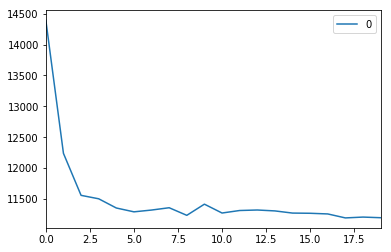

In [144]:
pd.DataFrame(rmse_val).plot()